In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from mlaut.benchmarking.data import RAMDataset
from sklearn import datasets
from mlaut.highlevel.tasks import CSCTask, CSRTask

from mlaut.benchmarking.results import HDDResults, RAMResults
from mlaut.highlevel.strategies import CSCStrategy
from mlaut.model_selection import SingleSplit
from mlaut.benchmarking.orchestration import Orchestrator

from sklearn import linear_model
from mlaut.strategies.baseline import BaselineClassifierStrategy, BaselineRegressorStrategy
from mlaut.strategies.bayes import GaussianNaiveBayesStrategy, BernoulliNaiveBayesStrategy
from mlaut.strategies.cluster import KNeighboursStrategy
from mlaut.strategies.decision_trees import DecisionTreeClassifierStrategy, DecisionTreeRegressorStrategy
from mlaut.strategies.ensemble import (RandomForestClassifierStrategy,
                                       RandomForestRegressorStrategy,
                                       GradientBoostingClassifierStrategy,
                                       GradientBoostingRegressorStrategy, 
                                       BaggingClassifierStrategy, 
                                       BaggingRegressorStrategy)
from mlaut.strategies.glm import (LinearRegressonStrategy, 
                                  RidgeRegressionStrategy, 
                                  LassoStrategy, 
                                  LassoLarsStrategy, 
                                  LogisticRegressionStrategy, 
                                  BayesianRidgeStrategy, 
                                  PassiveAggressiveClassifierStrategy)
from mlaut.strategies.svm import SVMStrategy, SVRStrategy
from mlaut.strategies.neural_networks import KerasClassificationStrategy, KerasRegressionStrategy
from mlaut.benchmarking.evaluation import Evaluator

iris = datasets.load_iris()
wine = datasets.load_wine()


/media/Data/PhD/mlaut/venv_mlaut/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/media/Data/PhD/mlaut/venv_mlaut/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/media/Data/PhD/mlaut/venv_mlaut/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/media/Data/PhD/mlaut/venv_mlaut/lib/python3.6/site-

# Benchmark strategies

In [2]:

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['target'] = iris.target

wine_pd = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_pd['target'] = wine.target

datasets = ([RAMDataset(iris_pd, name='iris'),
            RAMDataset(wine_pd, name='wine')])

tasks = [CSCTask(target="target") for _ in range(len(datasets))]
results = RAMResults()


strategies = [
    BaselineClassifierStrategy, 
    GaussianNaiveBayesStrategy, 
    KNeighboursStrategy,
    DecisionTreeClassifierStrategy, 
    KerasClassificationStrategy
]

results = HDDResults(path='results')

orchestrator = Orchestrator(datasets=datasets,
                            tasks=tasks,  
                            strategies=strategies, 
                            cv=SingleSplit(), 
                            results=results,
                            log_file_path=None)

orchestrator.fit_predict(save_fitted_strategies=True, overwrite_predictions=True)

/media/Data/PhD/mlaut/mlaut/benchmarking/base.py:144: UserWarning: Existing results file found in given path: results. Results file will be updated
  warn(f"Existing results file found in given path: {path}. "
INFO:root:********* Fitting BaselineClassifier
/media/Data/PhD/mlaut/venv_mlaut/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
INFO:root:********* Fitting GaussianNaiveBayes
INFO:root:********* Fitting KNeighbours
INFO:root:********* Fitting DecisionTreeClassifier
INFO:root:********* Fitting KerasClassifier4Layers


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


112/112 [==============================] - 0s 2ms/sample - loss: 0.2328 - acc: 0.3839


INFO:root:********* Fitting BaselineClassifier
/media/Data/PhD/mlaut/venv_mlaut/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
INFO:root:********* Fitting GaussianNaiveBayes
INFO:root:********* Fitting KNeighbours
INFO:root:********* Fitting DecisionTreeClassifier
INFO:root:********* Fitting KerasClassifier4Layers


133/133 [==============================] - 0s 1ms/sample - loss: 0.3883 - acc: 0.4135


## Evaluate results

In [3]:
from mlaut.benchmarking.evaluation import Evaluator
from mlaut.benchmarking.metrics import PairwiseMetric
from sklearn.metrics import accuracy_score

In [4]:
evaluator = Evaluator(results)

metric = PairwiseMetric(func=accuracy_score, name='accuracy')
metrics_by_strategy = evaluator.evaluate(metric=metric)
metrics_by_strategy

,strategy,accuracy_mean,accuracy_stderr
0,BaselineClassifier,0.359064,0.073437
1,DecisionTreeClassifier,0.940351,0.037157
2,GaussianNaiveBayes,0.964620,0.028692
3,KNeighbours,0.931287,0.036847
4,KerasClassifier4Layers,0.568421,0.073124


In [6]:
evaluator.rank()

,strategy,accuracy_mean_rank
0,BaselineClassifier,5.00
1,DecisionTreeClassifier,2.50
2,GaussianNaiveBayes,1.25
3,KNeighbours,2.25
4,KerasClassifier4Layers,4.00


In [11]:
df, df_pivot = evaluator.t_test()
df_pivot

BaselineClassifier           DecisionTreeClassifier  \
                                   t_stat     p_val                 t_stat   
BaselineClassifier               0.000000  1.000000              -5.061950   
DecisionTreeClassifier           5.061950  0.036881               0.000000   
GaussianNaiveBayes               5.266720  0.034212               2.117099   
KNeighbours                      4.682287  0.042711              -0.210923   
KerasClassifier4Layers           1.027650  0.412153              -2.206419   

                                 GaussianNaiveBayes           KNeighbours  \
                           p_val             t_stat     p_val      t_stat   
BaselineClassifier      0.036881          -5.266720  0.034212   -4.682287   
DecisionTreeClassifier  1.000000          -2.117099  0.168460    0.210923   
GaussianNaiveBayes      0.168460           0.000000  1.000000    0.768833   
KNeighbours             0.852486          -0.768833  0.522372    0.000000   
KerasClassifier4Layers  0.158094          -2.349031  0.143280   -2.089329   

                                 KerasClassifier4Layers            
                           p_val                 t_stat     p_val  
BaselineClassifier      0.042711              -1.027650  0.412153  
DecisionTreeClassifier  0.852486               2.206419  0.158094  
GaussianNaiveBayes      0.522372               2.349031  0.143280  
KNeighbours             1.000000               2.089329  0.171872  
KerasClassifier4Layers  0.171872               0.000000  1.000000

In [15]:
evaluator.t_test_with_bonferroni_correction()

,BaselineClassifier,DecisionTreeClassifier,GaussianNaiveBayes,KNeighbours,KerasClassifier4Layers
BaselineClassifier,False,False,False,False,False
DecisionTreeClassifier,False,False,False,False,False
GaussianNaiveBayes,False,False,False,False,False
KNeighbours,False,False,False,False,False
KerasClassifier4Layers,False,False,False,False,False


In [12]:
df, df_pivot = evaluator.sign_test()
df_pivot

estimator_2,BaselineClassifier,DecisionTreeClassifier,GaussianNaiveBayes,KNeighbours,KerasClassifier4Layers
estimator_1,,,,,
BaselineClassifier,0.5,0.5,0.5,0.5,0.5
DecisionTreeClassifier,0.5,0.5,0.5,1.0,0.5
GaussianNaiveBayes,0.5,0.5,0.5,1.0,0.5
KNeighbours,0.5,1.0,0.5,0.5,0.5
KerasClassifier4Layers,0.5,0.5,0.5,0.5,0.5


In [13]:
df, df_pivot = evaluator.ranksum_test()
df_pivot

BaselineClassifier           DecisionTreeClassifier  \
                                   t_stat     p_val                 t_stat   
BaselineClassifier               0.000000  1.000000              -1.549193   
DecisionTreeClassifier           1.549193  0.121335               0.000000   
GaussianNaiveBayes               1.549193  0.121335               1.549193   
KNeighbours                      1.549193  0.121335               0.000000   
KerasClassifier4Layers           0.774597  0.438578              -1.549193   

                                 GaussianNaiveBayes           KNeighbours  \
                           p_val             t_stat     p_val      t_stat   
BaselineClassifier      0.121335          -1.549193  0.121335   -1.549193   
DecisionTreeClassifier  1.000000          -1.549193  0.121335    0.000000   
GaussianNaiveBayes      0.121335           0.000000  1.000000    0.387298   
KNeighbours             1.000000          -0.387298  0.698535    0.000000   
KerasClassifier4Layers  0.121335          -1.549193  0.121335   -1.549193   

                                 KerasClassifier4Layers            
                           p_val                 t_stat     p_val  
BaselineClassifier      0.121335              -0.774597  0.438578  
DecisionTreeClassifier  1.000000               1.549193  0.121335  
GaussianNaiveBayes      0.698535               1.549193  0.121335  
KNeighbours             1.000000               1.549193  0.121335  
KerasClassifier4Layers  0.121335               0.000000  1.000000

In [17]:
df, df_pivot = evaluator.friedman_test()
df_pivot

,statistic,p_value
0,7.282051,0.121713


In [19]:
evaluator.nemenyi()

,BaselineClassifier,DecisionTreeClassifier,GaussianNaiveBayes,KNeighbours,KerasClassifier4Layers
BaselineClassifier,-1.000000,0.694901,0.287219,0.553625,0.998548
DecisionTreeClassifier,0.694901,-1.000000,0.967863,0.999533,0.853779
GaussianNaiveBayes,0.287219,0.967863,-1.000000,0.992976,0.458564
KNeighbours,0.553625,0.999533,0.992976,-1.000000,0.738983
KerasClassifier4Layers,0.998548,0.853779,0.458564,0.738983,-1.000000


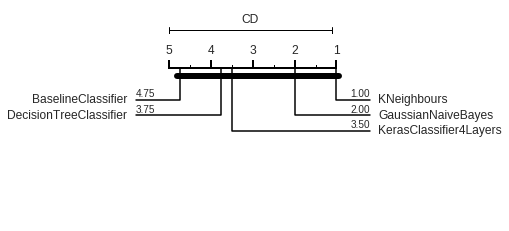

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff169bae128>)

In [20]:
evaluator.plot_critical_difference_diagram()